<a href="https://colab.research.google.com/github/EmmanuelLwele/Parametric-Representation-of-3D-Propeller-Blade-Geometry/blob/main/Question_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ESGI 2025 AALBORG

## PROBLEM 2 Parametric Representation of 3D Propeller Blade Geometry

### QUESTION #1

#### Description of the camber as a reversible transformation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
from tqdm import tqdm
import math

from IPython.core.magic import register_cell_magic
@register_cell_magic
def skip(line, cell):
    return

##### **Going forwards**

Outline of the cross section from the given parameters

In [ ]:
# cross section parameters

mm = 0.02             # max blade half-width
pp = 0.5              # x-coordinate of point in the camber line giving the max blade half-width
rr = 0.04              # leading edge radius
tt = np.sqrt(rr)/1.1

In [ ]:
# y-coordinate of points in the camber line as a function of the x-coordinate

def yycc(x,m,p):

    out = m *(2*p*x -x**2)/p**2
    if (x > p):
        out = m*(1 -2*p +2*p*x-x**2)/(1-p)**2
    return out


# derivative of the funtion giving the y-coord

def dyycc(x,m,p):
    # Use np.where for vectorized conditional logic
    out = np.where(x <= p, m * (2*p - 2*x) / p**2, m * (2*p - 2*x) / (1-p)**2)
    return out


# half-width as a function of the x-coord of the corresponding point in the camber line

def width(x,t):
  out = t *(0.2969*np.sqrt(x)-0.1260 *x -0.3516 * x**2 + 0.2843 * x**3 -0.10150 * x**4)/0.20
  return out


# angle between tangent to camber line and horizontal axis

def varphi(x,m,p):
  out = np.arctan2(dyycc(x,m,p),1)
  return out


# points in the upper curve (suction side)

def xxuu(x,m,p,t):
  out = x - width(x,t) * np.sin(varphi(x,m,p))
  return out

def yyuu(x,m,p,t):
  out = yycc(x,m,p) + width(x,t) * np.cos(varphi(x,m,p))
  return out


# points in the lower curve (pressure side)

def xxll(x,m,p,t):
  out = x + width(x,t) * np.sin(varphi(x,m,p))
  return out

def yyll(x,m,p,t):
  out = yycc(x,m,p) - width(x,t) * np.cos(varphi(x,m,p))
  return out


In [ ]:
npts = 1000
xx = np.linspace(0,1,npts)
YC = np.array([yycc(u,mm,pp) for u in xx])

In [ ]:
%%skip

plt.axis('equal')
plt.title(f'Camber line for m={mm}, p={pp} and r={rr}')
plt.plot(xx,YC)
#plt.axis('off')
plt.show()

In [ ]:
%%skip

half_width = np.array([width(u,tt) for u in xx])

plt.axis('equal')
plt.title(f'Half-width function for m={mm}, p={pp} and r={rr}')
plt.plot(xx,half_width)

In [ ]:
%%skip

angles = np.array([varphi(u,mm,pp) for u in xx])

plt.axis('equal')
plt.title(f'Varphi for m={mm}, p={pp} and r={rr}')
plt.plot(xx,angles)

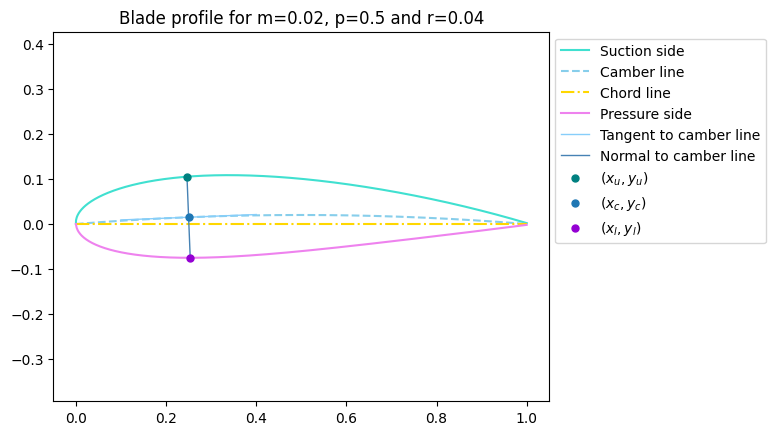

In [ ]:
XU = np.array([xxuu(u,mm,pp,tt) for u in xx])
YU = np.array([yyuu(u,mm,pp,tt) for u in xx])
XL = np.array([xxll(u,mm,pp,tt) for u in xx])
YL = np.array([yyll(u,mm,pp,tt) for u in xx])

x_c = 0.25

plt.axis('equal')
plt.title(f'Blade profile for m={mm}, p={pp} and r={rr}')

# lines
plt.plot(XU,YU, color='turquoise',label='Suction side')
plt.plot(xx,YC, color='skyblue',linestyle='dashed',label='Camber line')
plt.plot([0,1],[0,0], color='gold',linestyle='dashdot',label='Chord line')
plt.plot(XL,YL, color='violet',label='Pressure side')

# tangent
plt.plot([x_c-0.15, x_c+0.15], [dyycc(x_c, mm, pp)*(-0.15)+yycc(x_c, mm, pp), dyycc(x_c, mm, pp)*(0.15)+yycc(x_c, mm, pp)],
         color='lightskyblue', linewidth=1, label='Tangent to camber line')

# normal
plt.plot([xxuu(x_c,mm,pp,tt), xxll(x_c,mm,pp,tt)], [yyuu(x_c,mm,pp,tt), yyll(x_c,mm,pp,tt)],
         color='steelblue', linewidth=1, label='Normal to camber line')

# points
plt.plot(xxuu(x_c,mm,pp,tt), yyuu(x_c,mm,pp,tt), 'o', markersize=5, color='teal', label='$(x_u,y_u)$')  # plot in upper curve
plt.plot(x_c, yycc(x_c,mm,pp), 'o', markersize=5, label='$(x_c,y_c)$')  # plot in camber line
plt.plot(xxll(x_c,mm,pp,tt), yyll(x_c,mm,pp,tt), 'o', markersize=5, color='darkviolet', label='$(x_l,y_l)$')  # plot in lower curve
plt.legend(bbox_to_anchor=(1.45, 1))
plt.show()

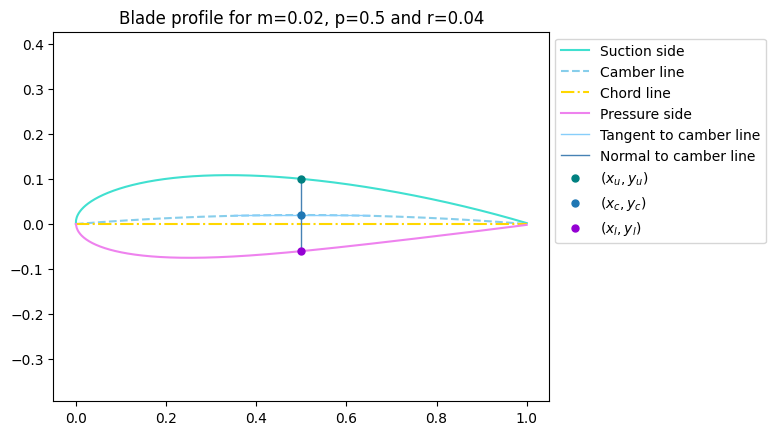

In [ ]:
XU = np.array([xxuu(u,mm,pp,tt) for u in xx])
YU = np.array([yyuu(u,mm,pp,tt) for u in xx])
XL = np.array([xxll(u,mm,pp,tt) for u in xx])
YL = np.array([yyll(u,mm,pp,tt) for u in xx])

x_c = 0.5

plt.axis('equal')
plt.title(f'Blade profile for m={mm}, p={pp} and r={rr}')

# lines
plt.plot(XU,YU, color='turquoise',label='Suction side')
plt.plot(xx,YC, color='skyblue',linestyle='dashed',label='Camber line')
plt.plot([0,1],[0,0], color='gold',linestyle='dashdot',label='Chord line')
plt.plot(XL,YL, color='violet',label='Pressure side')

# tangent
plt.plot([x_c-0.15, x_c+0.15], [dyycc(x_c, mm, pp)*(-0.15)+yycc(x_c, mm, pp), dyycc(x_c, mm, pp)*(0.15)+yycc(x_c, mm, pp)],
         color='lightskyblue', linewidth=1, label='Tangent to camber line')

# normal
plt.plot([xxuu(x_c,mm,pp,tt), xxll(x_c,mm,pp,tt)], [yyuu(x_c,mm,pp,tt), yyll(x_c,mm,pp,tt)],
         color='steelblue', linewidth=1, label='Normal to camber line')

# points
plt.plot(xxuu(x_c,mm,pp,tt), yyuu(x_c,mm,pp,tt), 'o', markersize=5, color='teal', label='$(x_u,y_u)$')  # plot in upper curve
plt.plot(x_c, yycc(x_c,mm,pp), 'o', markersize=5, label='$(x_c,y_c)$')  # plot in camber line
plt.plot(xxll(x_c,mm,pp,tt), yyll(x_c,mm,pp,tt), 'o', markersize=5, color='darkviolet', label='$(x_l,y_l)$')  # plot in lower curve
plt.legend(bbox_to_anchor=(1.45, 1))
plt.show()

In [ ]:
%%skip

# center of the leading-edge circle

x_circle = rr * np.cos(np.arctan(2*mm/pp))
y_circle = rr * np.sin(np.arctan(2*mm/pp))

print(x_circle)
print(y_circle)

In [ ]:
%%skip

plt.rcParams["figure.figsize"] = (9,9)

fig, ax = plt.subplots()

ax.set_aspect('equal')  # same as plt.axis('equal')

# Now use ax instead of plt for plotting
ax.plot(XU, YU, color='turquoise', label='Suction side')
ax.plot(xx, YC, color='skyblue', linestyle='dashed', label='Camber line')
ax.plot([0, 1], [0, 0], color='gold', linestyle='dashdot', label='Chord line')
ax.plot(XL, YL, color='violet', label='Pressure side')

# Tangent
ax.plot([x_c - 0.15, x_c + 0.15],
        [dyycc(x_c, mm, pp) * (-0.15) + yycc(x_c, mm, pp),
         dyycc(x_c, mm, pp) * (0.15) + yycc(x_c, mm, pp)],
        color='lightskyblue', linewidth=1, label='Tangent to camber line')

# Normal
ax.plot([xxuu(x_c, mm, pp, tt), xxll(x_c, mm, pp, tt)],
        [yyuu(x_c, mm, pp, tt), yyll(x_c, mm, pp, tt)],
        color='steelblue', linewidth=1, label='Normal to camber line')

# Points
ax.plot(xxuu(x_c, mm, pp, tt), yyuu(x_c, mm, pp, tt), 'o', markersize=5, color='teal', label='$(x_u,y_u)$')
ax.plot(x_c, yycc(x_c, mm, pp), 's', markersize=5, label='$(x_c,y_c)$')
ax.plot(xxll(x_c, mm, pp, tt), yyll(x_c, mm, pp, tt), 'D', markersize=4, color='darkviolet', label='$(x_l,y_l)$')

# Create and add the circle
circle = plt.Circle((x_circle, y_circle), rr, color='darkslateblue', fill=False, label='Leading circle')
ax.add_patch(circle)

ax.legend(bbox_to_anchor=(1.45, 1.05))
plt.show()


##### Going backwards

In [ ]:
from scipy.optimize import root_scalar

In [ ]:
# the function to compute alpha and beta for given x-coordinate

def find_alpha_and_beta(x, m, p, t, x0_guess=0.5, tol=1e-6):
    """
    Find: alpha such that xxuu(alpha, m, p, t) = x
    and beta such that xxll(beta, m, p, t) = x.
    """
    targets = [x]
    solutionsu = []
    solutionsl = []

    for value in targets:
        # functions whose root we want:
        # f(x) = xxuu(x) - value = 0
        fu = lambda x: xxuu(x, m, p, t) - value
        # g(x) = xxcc(x) - value = 0
        fl = lambda x: xxll(x, m, p, t) - value

        # initial guess for the root
        x0 = x0_guess

        # we try to bracket the root around [0,1]
        try:
            sol = root_scalar(fu, bracket=(0.0, 1.0), method="bisect", xtol=tol)
            if sol.converged:
                solutionsu.append(sol.root)
            else:
                solutionsu.append(np.nan)
        except ValueError:
            # if no sign change in [0,1]
            solutionsu.append(np.nan)

        # initial guess for the root
        x0 = x0_guess

        # we try to bracket the root around [0,1]
        try:
            sol = root_scalar(fl, bracket=(0.0, 1.0), method="bisect", xtol=tol)
            if sol.converged:
                solutionsl.append(sol.root)
            else:
                solutionsl.append(np.nan)
        except ValueError:
            # if no sign change in [0,1]
            solutionsl.append(np.nan)

    return np.array(solutionsu), np.array(solutionsl), targets


In [ ]:
common_x = 0.2

alpha, beta, y_c = find_alpha_and_beta(common_x,mm, pp, tt)

print(alpha)
print(beta)
print(y_c)

[0.20412731]
[0.1957922]
[0.2]


In [ ]:
# check outputs

print(xxuu(alpha,mm,pp,tt))
print(yyuu(alpha,mm,pp,tt))
print(xxll(beta,mm,pp,tt))
print(yyll(beta,mm,pp,tt))

[0.19999995]
[0.1001829]
[0.20000011]
[-0.07385556]


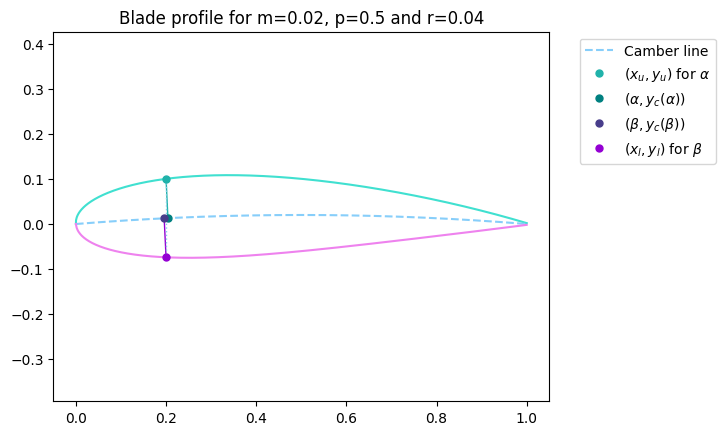

In [ ]:
XU = np.array([xxuu(u,mm,pp,tt) for u in xx])
YU = np.array([yyuu(u,mm,pp,tt) for u in xx])
XL = np.array([xxll(u,mm,pp,tt) for u in xx])
YL = np.array([yyll(u,mm,pp,tt) for u in xx])

common_x = 0.2
alpha, beta, y_c = find_alpha_and_beta(common_x,mm, pp, tt)
alpha_for_x = alpha[0]
beta_for_x = beta[0]

plt.axis('equal')
plt.title(f'Blade profile for m={mm}, p={pp} and r={rr}')
# curves
plt.plot(XU,YU, color='turquoise')
plt.plot(xx,YC, color='lightskyblue', linestyle='dashed',label='Camber line')
plt.plot(XL,YL, color='violet')
# line segments
plt.plot([common_x, alpha_for_x], [yyuu(alpha_for_x,mm,pp,tt), yycc(alpha_for_x,mm,pp)],
         color='lightseagreen', linewidth=1)
plt.plot([common_x, beta_for_x], [yyll(beta_for_x,mm,pp,tt), yycc(beta_for_x,mm,pp)],
         color='darkviolet', linewidth=1)
plt.plot([common_x, common_x], [yyuu(alpha_for_x,mm,pp,tt), yyll(beta_for_x,mm,pp,tt)],
         color='skyblue', linestyle='dotted', linewidth=1)
# points
plt.plot(common_x, yyuu(alpha_for_x,mm,pp,tt), 'o', markersize=5, color='lightseagreen', label='$(x_u,y_u)$ for $\\alpha$')  # point in upper curve
plt.plot(alpha_for_x, yycc(alpha_for_x,mm,pp), 'o', markersize=5, color='teal', label='$(\\alpha,y_c(\\alpha))$')  # alpha-point in camber line
plt.plot(beta_for_x, yycc(beta_for_x,mm,pp), 'o', markersize=5, color='darkslateblue', label='$(\\beta,y_c(\\beta))$')  # beta-point in camber line
plt.plot(common_x, yyll(beta_for_x,mm,pp, tt), 'o', markersize=5, color='darkviolet', label='$(x_l,y_l)$ for $\\beta$')  # point in lower curve

plt.legend(bbox_to_anchor=(1.35, 1))
plt.show()

### QUESTION #7

In [ ]:
# the function to compute alpha and beta for targets

def find_x_for_targets(m, p, t, x0_guess=0.5, tol=1e-6):
    """
    Find x_i such that xxuu(x_i, m, p, t) = target_i
    for target_i in {0.1, 0.2, ..., 0.9}.
    """
    targets = np.cos(np.arange(0, math.pi, 0.02)) / 2 + 0.5
    solutionsu = []
    solutionsl = []

    for y in targets:
        # function whose root we want: f(x) = xxuu(x) - y = 0
        fu = lambda x: xxuu(x, m, p, t) - y
        fl = lambda x: xxll(x, m, p, t) - y

        # initial guess for the root
        x0 = x0_guess

        # we try to bracket the root around [0,1]
        try:
            sol = root_scalar(fu, bracket=(0.0, 1.0), method="bisect", xtol=tol)
            if sol.converged:
                solutionsu.append(sol.root)
            else:
                solutionsu.append(np.nan)
        except ValueError:
            # if no sign change in [0,1]
            solutionsu.append(np.nan)

        # initial guess for the root
        x0 = x0_guess

        # we try to bracket the root around [0,1]
        try:
            sol = root_scalar(fl, bracket=(0.0, 1.0), method="bisect", xtol=tol)
            if sol.converged:
                solutionsl.append(sol.root)
            else:
                solutionsl.append(np.nan)
        except ValueError:
            # if no sign change in [0,1]
            solutionsl.append(np.nan)

    return np.array(solutionsu), np.array(solutionsl), targets


In [ ]:
# choose sample points (vertically aligned)

xcima, xbaixo , yl = find_x_for_targets(mm, pp, tt)
#print("xxuu:",np.array([xxuu(u,mm,pp,tt) for u in xcima]))
#print("yyuu:",np.array([yyuu(u,mm,pp,tt) for u in xcima]))
#print("xxll:",np.array([xxll(u,mm,pp,tt) for u in xbaixo]))
#print("yyll:",np.array([yyll(u,mm,pp,tt) for u in xbaixo]))

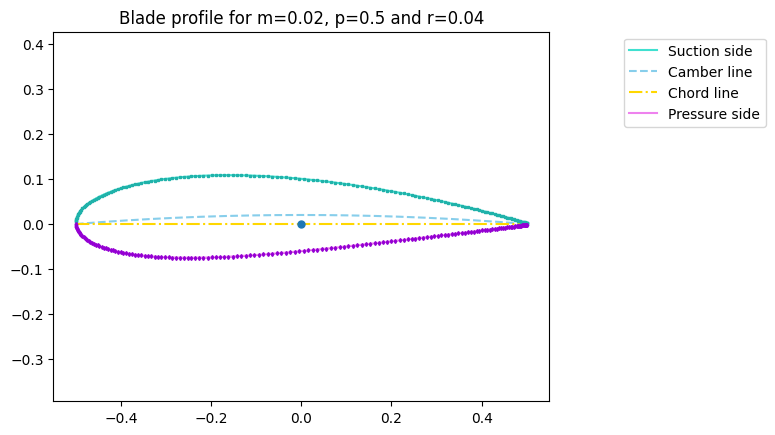

In [ ]:
XU = np.array([xxuu(u,mm,pp,tt) for u in xx])
YU = np.array([yyuu(u,mm,pp,tt) for u in xx])
XL = np.array([xxll(u,mm,pp,tt) for u in xx])
YL = np.array([yyll(u,mm,pp,tt) for u in xx])

d = 0.5       # horizontal displacement to move origin to (0.5,0)
x_c = 0.5

plt.axis('equal')
plt.title(f'Blade profile for m={mm}, p={pp} and r={rr}')

# lines
plt.plot(XU-d,YU, color='turquoise', label='Suction side')
plt.plot(xx-d,YC, color='skyblue', linestyle='dashed', label='Camber line')
plt.plot([0-d,1-d],[0,0], color='gold', linestyle='dashdot', label='Chord line')
plt.plot(XL-d,YL, color='violet', label='Pressure side')

# points
plt.plot(0, 0, 'o', markersize=5)
for u in xcima:
  plt.plot(xxuu(u,mm,pp,tt)-d, yyuu(u,mm,pp,tt), 's', markersize=2, color='lightseagreen')
for u in xbaixo:
  plt.plot(xxll(u,mm,pp,tt)-d, yyll(u,mm,pp,tt), 'd', markersize=2, color='darkviolet')

plt.legend(bbox_to_anchor=(1.45, 1))
plt.show()

In [ ]:
# compute rho and theta for each point in sample

import math

# Convert to polar coordinates (r, theta)
def get_polar(points):
  polar_points = []
  for x, y in points:
    r = math.hypot(x, y)               # sqrt(x^2 + y^2)
    theta = math.atan2(y, x) % (2 * math.pi)  # ensure 0 ≤ θ < 2π
    polar_points.append((r, theta))
  return polar_points


In [ ]:
sample_u = [(xxuu(u,mm,pp,tt)-d, yyuu(u,mm,pp,tt)) for u in xcima]
sample_l = [(xxll(u,mm,pp,tt)-d, yyll(u,mm,pp,tt)) for u in xbaixo]

sample_u_polar = get_polar(sample_u)
sample_l_polar = get_polar(sample_l)

print(sample_u_polar)
print(sample_l_polar)

[(0.5000031754133297, 0.003896759919850108), (0.49990388390722545, 0.003956552067539012), (0.499604141231613, 0.004137149143930517), (0.4991058365762629, 0.004437699892004871), (0.49840712306455265, 0.004859799104059879), (0.49750991113666504, 0.005402969994769251), (0.4964142487536702, 0.006068057789213173), (0.4951201950338882, 0.0068561062273045145), (0.49362782058855814, 0.007768364604363574), (0.4919409520736176, 0.008803992270579196), (0.49005781067223153, 0.009965799618812818), (0.4879803742767465, 0.0112545218843577), (0.48570876153660947, 0.012672281615262302), (0.48324310494258466, 0.014221456551406558), (0.4805891617919767, 0.015901132146007215), (0.47774335103724386, 0.01771655849779446), (0.4747095878456685, 0.019668533757099066), (0.47148806331396775, 0.02176053472805237), (0.4680827221206519, 0.023993921125807893), (0.46449378903126165, 0.026372810262192597), (0.4607233756610675, 0.02890045432127107), (0.4567717474408708, 0.03158174599203625), (0.4526447871657254, 0.0344

In [ ]:
sample_u_polar_reverse = sample_u_polar[::-1]

sample_polar = sample_u_polar_reverse + sample_l_polar
print(sample_polar)

[(0.5000323476911306, 3.1301475248462793), (0.49993122088359176, 3.1277627238355015), (0.49964964278595364, 3.123401956035875), (0.49918473829633914, 3.118506849007196), (0.49853492852344145, 3.1134166335410933), (0.49769940391675105, 3.108228977329517), (0.4966780391758088, 3.102980545969281), (0.49547307003860486, 3.097694778610535), (0.49408409207159126, 3.0923718950318584), (0.4925123938009202, 3.087015343320166), (0.4907561634803224, 3.081616308357227), (0.48882008068057814, 3.076184723041907), (0.48670078610591333, 3.0707060015193157), (0.4844031111319857, 3.06518725313413), (0.48192535054576463, 3.059618316820745), (0.47926911129470917, 3.0539970461100596), (0.47643772285266905, 3.0483240193757566), (0.47342949308847915, 3.042589354506408), (0.4702477993522605, 3.036792985110476), (0.46689265800120144, 3.0309281537790027), (0.46336579685613083, 3.0249910237001463), (0.45967068361437646, 3.0189801603176614), (0.4558056645034027, 3.0128854789012838), (0.45177597281776805, 3.006707

/tmp/ipython-input-3274057024.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.45, 1))


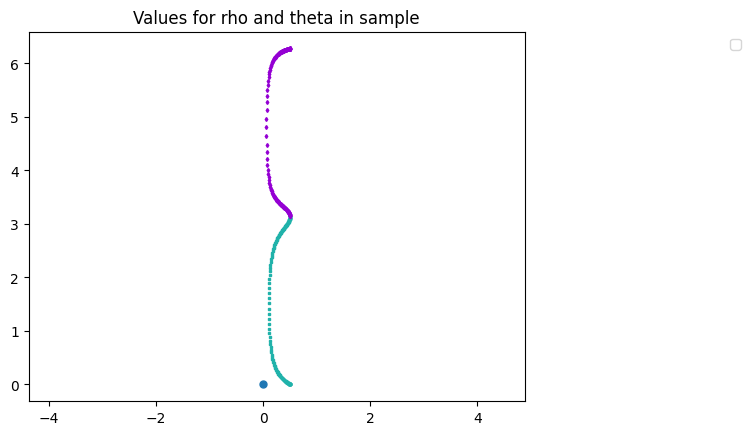

In [ ]:
plt.axis('equal')
plt.title(f'Values for rho and theta in sample')

# points
plt.plot(0, 0, 'o', markersize=5)
for pair in sample_u_polar:
  plt.plot(pair[0], pair[1], 's', markersize=2, color='lightseagreen')
for pair in sample_l_polar:
  plt.plot(pair[0], pair[1], 'd', markersize=2, color='darkviolet')

plt.legend(bbox_to_anchor=(1.45, 1))
plt.show()

In [ ]:
# Create the control points

R = 0.6   # hub radius

# sample_polar[k][0] gives us a value of rho
# sample_polar[k][1] gives us a value of theta

P0 = []
for k in range(len(sample_polar)):
  P0.append((R * np.cos(sample_polar[k][1]), R * np.sin(sample_polar[k][1]), 0))

P3 = []
for k in range(len(sample_polar)):
  P3.append((sample_polar[k][0] * np.cos(sample_polar[k][1]), sample_polar[k][0] * np.sin(sample_polar[k][1]), R - sample_polar[k][0]))

delta = 0.15  # step from P0 to P1
down_angle = - math.pi / 8

P1 = []
for k in range(len(sample_polar)):
  P1.append(((R - delta) * np.cos(sample_polar[k][1]), (R - delta) * np.sin(sample_polar[k][1]), - delta * np.tan(down_angle)))

epsilon = 0.05  # step from P3 to P2
up_angle = 3 * math.pi / 8

P2 = []
for k in range(len(sample_polar)):
  if up_angle >= 0:
    P2.append(((sample_polar[k][0] - epsilon) * np.cos(sample_polar[k][1]), (sample_polar[k][0] - epsilon) * np.sin(sample_polar[k][1]), R - sample_polar[k][0] - epsilon * np.tan(up_angle)))
  else:
    P2.append(((sample_polar[k][0] + epsilon) * np.cos(sample_polar[k][1]), (sample_polar[k][0] + epsilon) * np.sin(sample_polar[k][1]), R - sample_polar[k][0] - epsilon * np.tan(up_angle)))


In [ ]:
print(P0[0])
print(P1[0])
print(P2[0])
print(P3[0])

(np.float64(-0.5999607031373773), np.float64(0.006866927326236423), 0)
(np.float64(-0.44997052735303295), np.float64(0.005150195494677317), np.float64(0.062132034355964254))
(np.float64(-0.45000287292555896), np.float64(0.00515056571008426), np.float64(-0.020743025809785362))
(np.float64(-0.49999959818700707), np.float64(0.005722809653937295), 0.09996765230886939)


/tmp/ipython-input-2139686315.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.45, 1))


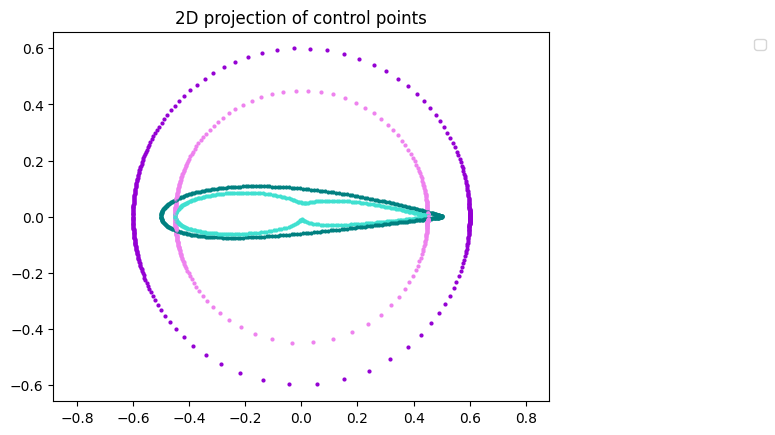

In [ ]:
d = 0.5       # horizontal displacement to move origin to (0.5,0)
x_c = 0.5

plt.axis('equal')
plt.title(f'2D projection of control points')

# points
for i in range(len(P0)):
  plt.plot(P0[i][0], P0[i][1], 'o', markersize=2, color='darkviolet')
  plt.plot(P1[i][0], P1[i][1], 'o', markersize=2, color='violet')
  plt.plot(P2[i][0], P2[i][1], 'o', markersize=2, color='turquoise')
  plt.plot(P3[i][0], P3[i][1], 'o', markersize=2, color='teal')

plt.legend(bbox_to_anchor=(1.45, 1))
plt.show()

In [ ]:
# discard point that are too close to neighbours

def distance(point1, point2):
  return np.sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2)

def discard_close_points(P0, P1, P2, P3, threshold):

  final_idx = [0]

  ctrl = 1

  for i in range(1, len(P0)):
    if i >= ctrl:
      for j in range(i, len(P0)):
        if distance(P0[i], P0[j]) > threshold:
          final_idx.append(j)
          ctrl = j+1
          break

  P0_new = [P0[i] for i in final_idx]
  P1_new = [P1[i] for i in final_idx]
  P2_new = [P2[i] for i in final_idx]
  P3_new = [P3[i] for i in final_idx]

  return P0_new, P1_new, P2_new, P3_new


In [ ]:
threshold = 2 * math.pi * R / 120

P0_new, P1_new, P2_new, P3_new = discard_close_points(P0, P1, P2, P3, threshold)

In [ ]:
print(len(P0), len(P0_new))

316 53


/tmp/ipython-input-3075280138.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.45, 1))


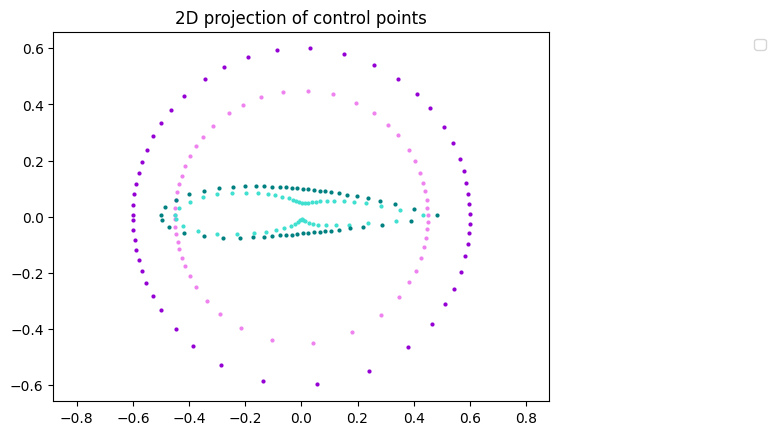

In [ ]:
d = 0.5       # horizontal displacement to move origin to (0.5,0)
x_c = 0.5

plt.axis('equal')
plt.title(f'2D projection of control points')

# points
for i in range(len(P0_new)):
  plt.plot(P0_new[i][0], P0_new[i][1], 'o', markersize=2, color='darkviolet')
  plt.plot(P1_new[i][0], P1_new[i][1], 'o', markersize=2, color='violet')
  plt.plot(P2_new[i][0], P2_new[i][1], 'o', markersize=2, color='turquoise')
  plt.plot(P3_new[i][0], P3_new[i][1], 'o', markersize=2, color='teal')

plt.legend(bbox_to_anchor=(1.45, 1))
plt.show()

In [ ]:
threshold = 2 * math.pi * R / 100

P0_new, P1_new, P2_new, P3_new = discard_close_points(P0_new, P1_new, P2_new, P3_new, threshold)

/tmp/ipython-input-3075280138.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.45, 1))


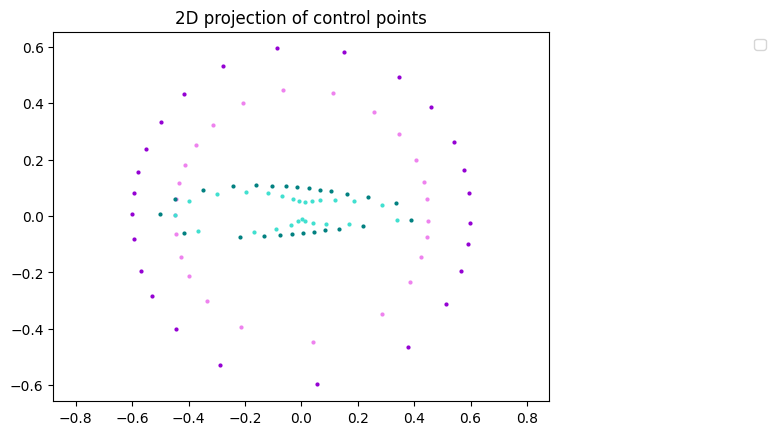

In [ ]:
d = 0.5       # horizontal displacement to move origin to (0.5,0)
x_c = 0.5

plt.axis('equal')
plt.title(f'2D projection of control points')

# points
for i in range(len(P0_new)):
  plt.plot(P0_new[i][0], P0_new[i][1], 'o', markersize=2, color='darkviolet')
  plt.plot(P1_new[i][0], P1_new[i][1], 'o', markersize=2, color='violet')
  plt.plot(P2_new[i][0], P2_new[i][1], 'o', markersize=2, color='turquoise')
  plt.plot(P3_new[i][0], P3_new[i][1], 'o', markersize=2, color='teal')

plt.legend(bbox_to_anchor=(1.45, 1))
plt.show()

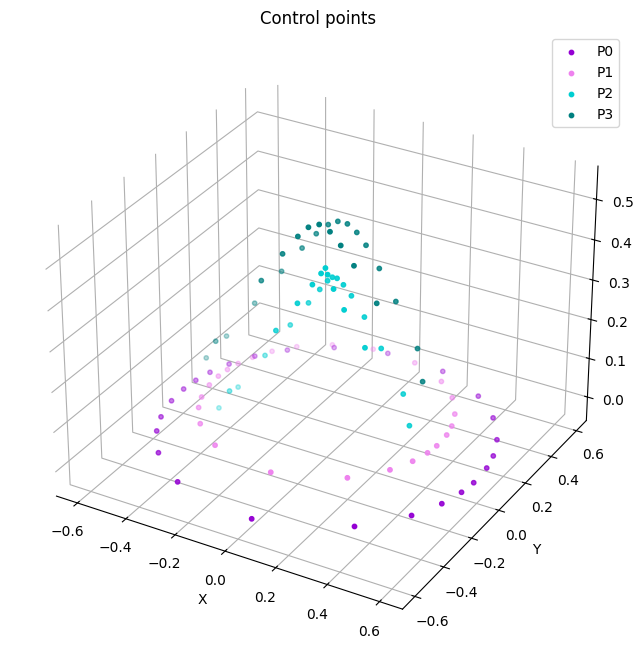

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # registers the 3D projection

# Unpack x, y, z coordinates from list of points
x0, y0, z0 = zip(*P0_new)
x1, y1, z1 = zip(*P1_new)
x2, y2, z2 = zip(*P2_new)
x3, y3, z3 = zip(*P3_new)

# Create 3D plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Outer background (the figure itself)
fig.patch.set_facecolor('white')

# Inner background (the 3D axes box)
ax.set_facecolor('white')

# Background color of the 3D panes (the 3 “walls” behind data)
ax.xaxis.pane.set_facecolor((1.0, 1.0, 1.0, 1.0))  # light blue RGBA
ax.yaxis.pane.set_facecolor((1.0, 1.0, 1.0, 1.0))  # light green RGBA
ax.zaxis.pane.set_facecolor((1.0, 1.0, 1.0, 1.0))  # light red RGBA

# Optional: remove pane edges for a smoother look
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

# Scatter plot
ax.scatter(x0, y0, z0, color='darkviolet', s=10, label='P0')
ax.scatter(x1, y1, z1, color='violet', s=10, label='P1')
ax.scatter(x2, y2, z2, color='darkturquoise', s=10, label='P2')
ax.scatter(x3, y3, z3, color='teal', s=10, label='P3')

# Optional: connect points or draw lines between them
# ax.plot(x, y, z, color='lightgray', linestyle='--')

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Control points')

ax.legend()

plt.show()

In [ ]:
# Define the Bezier polynomial

def line_param(i, t):
  '''
  i represents an index in P0, P1, P2, P3
  t varies from 0 to 1
  '''
  out = (1-t)**3 * np.asarray(P0_new[i]) + 3 * (1-t)**2 * t * np.asarray(P1_new[i]) + 3 * (1-t) * t**2 * np.asarray(P2_new[i])  + t**3 * np.asarray(P3_new[i])

  return out

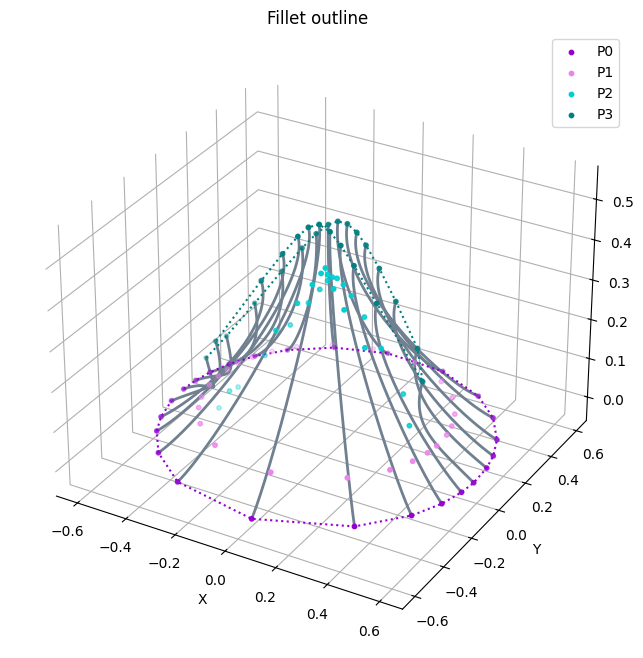

In [ ]:
# Unpack x, y, z coordinates from list of points
x0, y0, z0 = zip(*P0_new)
x1, y1, z1 = zip(*P1_new)
x2, y2, z2 = zip(*P2_new)
x3, y3, z3 = zip(*P3_new)

npts = 1000
ss = np.linspace(0,1,npts)

# Create 3D plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Outer background (the figure itself)
fig.patch.set_facecolor('white')

# Inner background (the 3D axes box)
ax.set_facecolor('white')

# Background color of the 3D panes (the 3 “walls” behind data)
ax.xaxis.pane.set_facecolor((1.0, 1.0, 1.0, 1.0))  # light blue RGBA
ax.yaxis.pane.set_facecolor((1.0, 1.0, 1.0, 1.0))  # light green RGBA
ax.zaxis.pane.set_facecolor((1.0, 1.0, 1.0, 1.0))  # light red RGBA

# Optional: remove pane edges for a smoother look
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

# lines
for i in range(len(P0_new)):
  ax.plot3D([line_param(i, t)[0] for t in ss], [line_param(i, t)[1] for t in ss], [line_param(i, t)[2] for t in ss],
          linewidth = 2, color='slategray')

# Scatter plot
ax.scatter(x0, y0, z0, color='darkviolet', s=10, label='P0')
ax.scatter(x1, y1, z1, color='violet', s=10, label='P1')
ax.scatter(x2, y2, z2, color='darkturquoise', s=10, label='P2')
ax.scatter(x3, y3, z3, color='teal', s=10, label='P3')

# Optional: connect points or draw lines between them
ax.plot(x0, y0, z0, color='darkviolet', linestyle=':')
ax.plot(x3, y3, z3, color='teal', linestyle=':')

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Fillet outline')

ax.legend()

plt.show()

In [ ]:
%%skip

# Define the smooth lines joining the control points

def _as_point(p):
    """Convert a point-like to a 1D float array."""
    p = np.asarray(p, dtype=float)
    if p.ndim != 1:
        raise ValueError("Points must be 1D sequences like (x,y) or (x,y,z).")
    return p

def _bernstein3(t):
    """
    Bernstein basis (degree 3) evaluated at t.
    Returns (B0, B1, B2, B3) with shapes broadcast to t.
    """
    t = np.asarray(t, dtype=float)
    u = 1.0 - t
    B0 = u**3
    B1 = 3*u*u*t
    B2 = 3*u*t*t
    B3 = t**3
    return B0, B1, B2, B3

def cubic_bezier_point(P0, P1, P2, P3, t):
    """
    Evaluate a cubic Bézier curve at parameter t ∈ [0,1].
    P0..P3 are (D,) points; t can be scalar or 1D array.
    Returns shape (D,) if scalar t, else (len(t), D).
    """
    P0, P1, P2, P3 = map(_as_point, (P0, P1, P2, P3))
    B0, B1, B2, B3 = _bernstein3(t)
    # shape handling
    if np.isscalar(t) or np.ndim(t) == 0:
        return B0*P0 + B1*P1 + B2*P2 + B3*P3
    else:
        # (N,1) * (1,D) → (N,D)
        return (B0[:, None]*P0 + B1[:, None]*P1 +
                B2[:, None]*P2 + B3[:, None]*P3)

def make_bezier_from_lists(P0_list, P1_list, P2_list, P3_list,
                           i0, i3, i1=None, i2=None):
    """
    Build a cubic Bézier curve using:
      start  = P0_list[i0]
      end    = P3_list[i3]
      ctrl1  = P1_list[i1] (defaults to i0)
      ctrl2  = P2_list[i2] (defaults to i3)

    Returns a callable curve(t) and a sampler sample(n=100).

    Notes:
    - Works for 2D or 3D (or any same-D).
    - i1/i2 are optional so you can pick control points independently
      (useful if your control lists are indexed differently).
    """
    if i1 is None: i1 = i0
    if i2 is None: i2 = i3

    P0 = _as_point(P0_list[i0])
    P1 = _as_point(P1_list[i1])
    P2 = _as_point(P2_list[i2])
    P3 = _as_point(P3_list[i3])

    # sanity: all same dimension
    D = {P0.shape, P1.shape, P2.shape, P3.shape}
    if len(D) != 1:
        raise ValueError("All points must have the same dimensionality.")

    def curve(t):
        """Evaluate at scalar or array t ∈ [0,1]."""
        return cubic_bezier_point(P0, P1, P2, P3, t)

    def sample(n=100, closed=False):
        """
        Return n samples along the curve as an (n,D) array.
        If closed=True, includes both endpoints (t in [0,1]).
        """
        t = np.linspace(0.0, 1.0, n, endpoint=closed)
        return curve(t)

    return curve, sample

In [ ]:
%%skip

# Build a curve from P0[0] → P3[1], using control points P1[0] and P2[1]:
curve, sample = make_bezier_from_lists(
    P0, P1, P2, P3,
    i0=0, i3=1, i1=0, i2=1
)

# Evaluate
p_mid = curve(0.5)        # point at t=0.5, shape (2,)
pts   = sample(n=200)     # (200, 2) array along the curve